In [4]:
import pandas as pd
import numpy as np

# Plotting and correlation
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


Visualization for yearly change in car type distribution

**Load data**

In [5]:
fuel_types = ['electric','plug-in hybrid electric','fuel cell','diesel','flex fuel','gasoline','gasoline hybrid','natural gas','propane']

df = pd.read_csv('data/yearly_all_data.csv')
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

print(f"shape: {df.shape}")
df.head()

shape: (7, 12)


,year,electric,plug-in hybrid electric,fuel cell,diesel,flex fuel,gasoline,gasoline hybrid,natural gas,propane,emissions,demand
0,2021,522445,305315,10127,590216,1208970,25998618,1298275,8461,90,53203603.23,269006652
1,2020,369364,259109,7129,700366,1144536,25021380,1155477,7676,897,49626238.88,268529517
2,2019,308447,251522,6933,680622,1131474,25526368,1114944,8462,1015,51049895.52,264368288
3,2018,232239,216328,5525,657857,1122312,25377093,1060166,8910,1063,53938026.76,275818547
4,2017,159705,163057,3271,640281,1108886,25313468,1019085,9212,1074,52856896.33,284621714


**Correlation**

<AxesSubplot: >

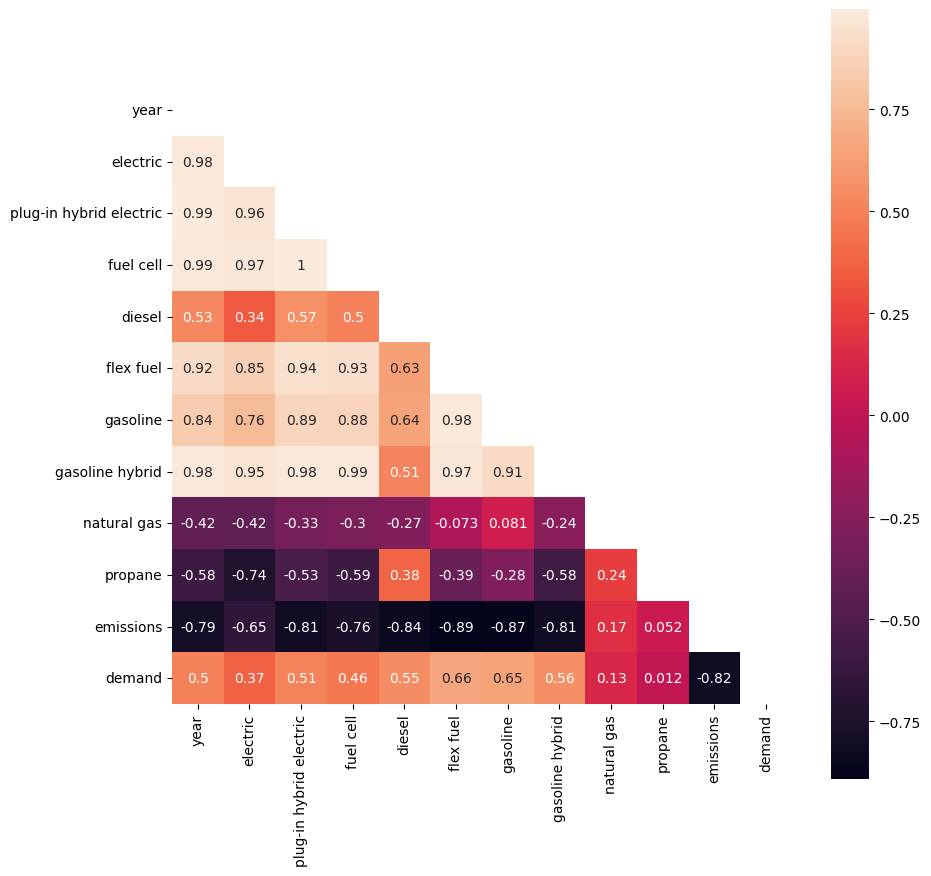

In [6]:
correlation = df.corr(method = 'pearson')
plt.subplots(figsize = (10,10))
masked = np.triu(np.ones_like(correlation, dtype=bool)) 
sns.heatmap(correlation,mask=masked,square = True, annot = True)

**Registered vehicles in California by fuel source over time**

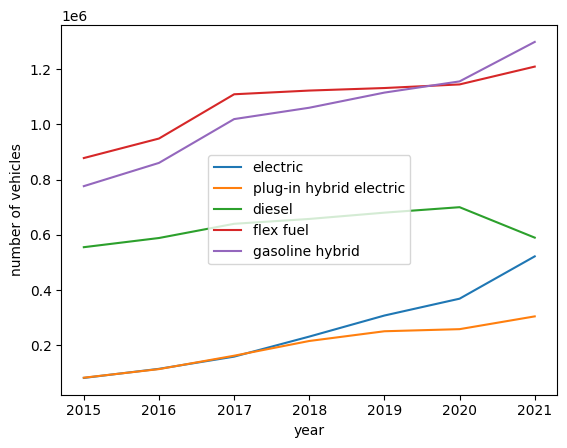

In [8]:
low_values = ['propane', 'natural gas', 'fuel cell']
high_values = ['gasoline']
for fuel in fuel_types:
    if fuel not in low_values and fuel not in high_values:
        plt.plot(df['year'], df[fuel], label=fuel)
plt.ylabel('number of vehicles')
plt.xlabel('year')
plt.legend()
plt.show()

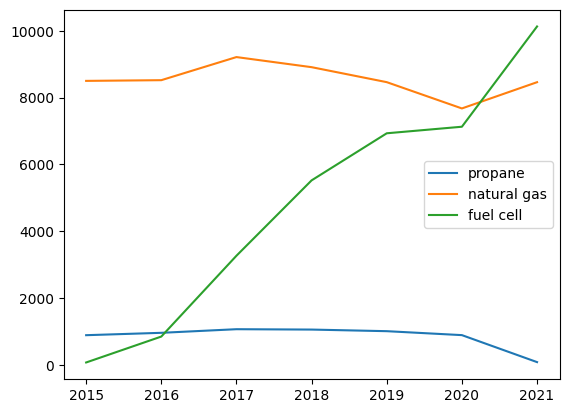

In [55]:
for fuel in low_values:
    plt.plot(df['year'], df[fuel], label=fuel)
plt.legend()
plt.ylabel('number of vehicles')
plt.xlabel('year')
plt.show()

Propane-, natural gas-, and fuel cell-powered vehicles are shown separately because there are very few

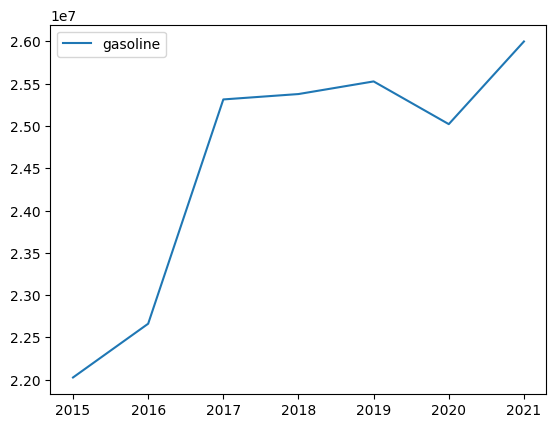

In [56]:
plt.plot(df['year'], df['gasoline'], label='gasoline')
plt.legend()
plt.ylabel('number of vehicles')
plt.xlabel('year')
plt.show()

Gasoline-powered vehicles are shown separately because they are by far the most numerous